# The thesis analysis
## The thesis analysis is performed here, includes methodology, evaluation and conclusion


### Data read in
First the data must be read in from the different devices and the features must be sorted

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from itertools import compress
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold

#### Danmini doorbell

In [14]:
mirai_ack = pd.read_csv("Danmini_doorbell/mirai_attacks/ack.csv");
mirai_scan = pd.read_csv("Danmini_doorbell/mirai_attacks/scan.csv");
mirai_syn = pd.read_csv("Danmini_doorbell/mirai_attacks/syn.csv");
mirai_udp = pd.read_csv("Danmini_doorbell/mirai_attacks/udp.csv");
mirai_udpplain = pd.read_csv("Danmini_doorbell/mirai_attacks/udpplain.csv");
gafgyt_junk = pd.read_csv("Danmini_doorbell/gafgyt_attacks/junk.csv");
gafgyt_scan = pd.read_csv("Danmini_doorbell/gafgyt_attacks/scan.csv");
gafgyt_combo = pd.read_csv("Danmini_doorbell/gafgyt_attacks/combo.csv");
gafgyt_tcp = pd.read_csv("Danmini_doorbell/gafgyt_attacks/tcp.csv");
gafgyt_udp = pd.read_csv("Danmini_doorbell/gafgyt_attacks/udp.csv");

frames = [mirai_ack,mirai_scan,mirai_syn,mirai_udp,mirai_udpplain,gafgyt_combo,gafgyt_junk,gafgyt_scan,gafgyt_tcp,gafgyt_udp];

malicious_data = pd.concat(frames);
benign_data = pd.read_csv("Danmini_doorbell/benign_traffic.csv");



In [3]:
malicious_data.shape

(968750, 115)

#### Ecobee

In [15]:
# ecobee_mirai_ack = pd.read_csv("Ecobee/mirai_attacks/ack.csv");
# ecobee_mirai_scan = pd.read_csv("Ecobee/mirai_attacks/scan.csv");
# ecobee_mirai_syn = pd.read_csv("Ecobee/mirai_attacks/syn.csv");
# ecobee_mirai_udp = pd.read_csv("Ecobee/mirai_attacks/udp.csv");
# ecobee_mirai_udpplain = pd.read_csv("Ecobee/mirai_attacks/udpplain.csv");
# ecobee_gafgyt_junk = pd.read_csv("Ecobee/gafgyt_attacks/junk.csv");
# ecobee_gafgyt_scan = pd.read_csv("Ecobee/gafgyt_attacks/scan.csv");
# ecobee_gafgyt_combo = pd.read_csv("Ecobee/gafgyt_attacks/combo.csv");
# ecobee_gafgyt_tcp = pd.read_csv("Ecobee/gafgyt_attacks/tcp.csv");
# ecobee_gafgyt_udp = pd.read_csv("Ecobee/gafgyt_attacks/udp.csv");

# frames = [ecobee_mirai_ack,ecobee_mirai_scan,ecobee_mirai_syn,ecobee_mirai_udp,ecobee_mirai_udpplain,ecobee_gafgyt_combo,ecobee_gafgyt_junk,ecobee_gafgyt_scan,ecobee_gafgyt_tcp,ecobee_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Ecobee/benign_traffic.csv");

#### Ennio

In [17]:
# ennio_gafgyt_junk = pd.read_csv("Ennio/gafgyt_attacks/junk.csv");
# ennio_gafgyt_scan = pd.read_csv("Ennio/gafgyt_attacks/scan.csv");
# ennio_gafgyt_combo = pd.read_csv("Ennio/gafgyt_attacks/combo.csv");
# ennio_gafgyt_tcp = pd.read_csv("Ennio/gafgyt_attacks/tcp.csv");
# ennio_gafgyt_udp = pd.read_csv("Ennio/gafgyt_attacks/udp.csv");

# frames = [ennio_gafgyt_combo,ennio_gafgyt_junk,ennio_gafgyt_scan,ennio_gafgyt_tcp,ennio_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Ennio/benign_traffic.csv");



#### Philips

In [19]:
# philips_mirai_ack = pd.read_csv("Philips/mirai_attacks/ack.csv");
# philips_mirai_scan = pd.read_csv("Philips/mirai_attacks/scan.csv");
# philips_mirai_syn = pd.read_csv("Philips/mirai_attacks/syn.csv");
# philips_mirai_udp = pd.read_csv("Philips/mirai_attacks/udp.csv");
# philips_mirai_udpplain = pd.read_csv("Philips/mirai_attacks/udpplain.csv");
# philips_gafgyt_junk = pd.read_csv("Philips/gafgyt_attacks/junk.csv");
# philips_gafgyt_scan = pd.read_csv("Philips/gafgyt_attacks/scan.csv");
# philips_gafgyt_combo = pd.read_csv("Philips/gafgyt_attacks/combo.csv");
# philips_gafgyt_tcp = pd.read_csv("Philips/gafgyt_attacks/tcp.csv");
# philips_gafgyt_udp = pd.read_csv("Philips/gafgyt_attacks/udp.csv");

# frames = [philips_mirai_ack,philips_mirai_scan,philips_mirai_syn,philips_mirai_udp,philips_mirai_udpplain,philips_gafgyt_combo,philips_gafgyt_junk,philips_gafgyt_scan,philips_gafgyt_tcp,philips_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Philips/benign_traffic.csv");



#### Provision_PT_737E_SecurityCamera

In [21]:
# provision_mirai_ack = pd.read_csv("Provision_PT_737E_SecurityCamera/mirai_attacks/ack.csv");
# provision_mirai_scan = pd.read_csv("Provision_PT_737E_SecurityCamera/mirai_attacks/scan.csv");
# provision_mirai_syn = pd.read_csv("Provision_PT_737E_SecurityCamera/mirai_attacks/syn.csv");
# provision_mirai_udp = pd.read_csv("Provision_PT_737E_SecurityCamera/mirai_attacks/udp.csv");
# provision_mirai_udpplain = pd.read_csv("Provision_PT_737E_SecurityCamera/mirai_attacks/udpplain.csv");
# provision_gafgyt_junk = pd.read_csv("Provision_PT_737E_SecurityCamera/gafgyt_attacks/junk.csv");
# provision_gafgyt_scan = pd.read_csv("Provision_PT_737E_SecurityCamera/gafgyt_attacks/scan.csv");
# provision_gafgyt_combo = pd.read_csv("Provision_PT_737E_SecurityCamera/gafgyt_attacks/combo.csv");
# provision_gafgyt_tcp = pd.read_csv("Provision_PT_737E_SecurityCamera/gafgyt_attacks/tcp.csv");
# provision_gafgyt_udp = pd.read_csv("Provision_PT_737E_SecurityCamera/gafgyt_attacks/udp.csv");

# frames = [provision_mirai_ack,provision_mirai_scan,provision_mirai_syn,provision_mirai_udp,provision_mirai_udpplain,provision_gafgyt_combo,provision_gafgyt_junk,provision_gafgyt_scan,provision_gafgyt_tcp,provision_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Provision_PT_737E_SecurityCamera/benign_traffic.csv");



#### Provision_PT_838_Security_Camera

In [23]:
# provisions_mirai_ack = pd.read_csv("Provision_PT_838_Security_Camera/mirai_attacks/ack.csv");
# provisions_mirai_scan = pd.read_csv("Provision_PT_838_Security_Camera/mirai_attacks/scan.csv");
# provisions_mirai_syn = pd.read_csv("Provision_PT_838_Security_Camera/mirai_attacks/syn.csv");
# provisions_mirai_udp = pd.read_csv("Provision_PT_838_Security_Camera/mirai_attacks/udp.csv");
# provisions_mirai_udpplain = pd.read_csv("Provision_PT_838_Security_Camera/mirai_attacks/udpplain.csv");
# provisions_gafgyt_junk = pd.read_csv("Provision_PT_838_Security_Camera/gafgyt_attacks/junk.csv");
# provisions_gafgyt_scan = pd.read_csv("Provision_PT_838_Security_Camera/gafgyt_attacks/scan.csv");
# provisions_gafgyt_combo = pd.read_csv("Provision_PT_838_Security_Camera/gafgyt_attacks/combo.csv");
# provisions_gafgyt_tcp = pd.read_csv("Provision_PT_838_Security_Camera/gafgyt_attacks/tcp.csv");
# provisions_gafgyt_udp = pd.read_csv("Provision_PT_838_Security_Camera/gafgyt_attacks/udp.csv");

# frames = [provisions_mirai_ack,provisions_mirai_scan,provisions_mirai_syn,provisions_mirai_udp,provisions_mirai_udpplain,provisions_gafgyt_combo,provisions_gafgyt_junk,provisions_gafgyt_scan,provisions_gafgyt_tcp,provisions_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Provision_PT_838_Security_Camera/benign_traffic.csv");



#### Samsung

In [25]:
# samsung_gafgyt_junk = pd.read_csv("Samsung/gafgyt_attacks/junk.csv");
# samsung_gafgyt_scan = pd.read_csv("Samsung/gafgyt_attacks/scan.csv");
# samsung_gafgyt_combo = pd.read_csv("Samsung/gafgyt_attacks/combo.csv");
# samsung_gafgyt_tcp = pd.read_csv("Samsung/gafgyt_attacks/tcp.csv");
# samsung_gafgyt_udp = pd.read_csv("Samsung/gafgyt_attacks/udp.csv");

# frames = [samsung_gafgyt_combo,samsung_gafgyt_junk,samsung_gafgyt_scan,samsung_gafgyt_tcp,samsung_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("Samsung/benign_traffic.csv");



#### SimpleHome_XCS7_1002_WHT_Security_Camera

In [27]:
# simplehometwo_mirai_ack = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/mirai_attacks/ack.csv");
# simplehometwo_mirai_scan = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/mirai_attacks/scan.csv");
# simplehometwo_mirai_syn = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/mirai_attacks/syn.csv");
# simplehometwo_mirai_udp = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/mirai_attacks/udp.csv");
# simplehometwo_mirai_udpplain = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/mirai_attacks/udpplain.csv");
# simplehometwo_gafgyt_junk = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt_attacks/junk.csv");
# simplehometwo_gafgyt_scan = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt_attacks/scan.csv");
# simplehometwo_gafgyt_combo = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt_attacks/combo.csv");
# simplehometwo_gafgyt_tcp = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt_attacks/tcp.csv");
# simplehometwo_gafgyt_udp = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/gafgyt_attacks/udp.csv");

# frames = [simplehometwo_mirai_ack,simplehometwo_mirai_scan,simplehometwo_mirai_syn,simplehometwo_mirai_udp,simplehometwo_mirai_udpplain,simplehometwo_gafgyt_combo,simplehometwo_gafgyt_junk,simplehometwo_gafgyt_scan,simplehometwo_gafgyt_tcp,simplehometwo_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("SimpleHome_XCS7_1002_WHT_Security_Camera/benign_traffic.csv");



#### SimpleHome_XCS7_1003_WHT_Security_Camera

In [29]:
# simplehomethree_mirai_ack = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/mirai_attacks/ack.csv");
# simplehomethree_mirai_scan = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/mirai_attacks/scan.csv");
# simplehomethree_mirai_syn = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/mirai_attacks/syn.csv");
# simplehomethree_mirai_udp = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/mirai_attacks/udp.csv");
# simplehomethree_mirai_udpplain = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/mirai_attacks/udpplain.csv");
# simplehomethree_gafgyt_junk = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/gafgyt_attacks/junk.csv");
# simplehomethree_gafgyt_scan = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/gafgyt_attacks/scan.csv");
# simplehomethree_gafgyt_combo = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/gafgyt_attacks/combo.csv");
# simplehomethree_gafgyt_tcp = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/gafgyt_attacks/tcp.csv");
# simplehomethree_gafgyt_udp = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/gafgyt_attacks/udp.csv");

# frames = [simplehomethree_mirai_ack,simplehomethree_mirai_scan,simplehomethree_mirai_syn,simplehomethree_mirai_udp,simplehomethree_mirai_udpplain,simplehomethree_gafgyt_combo,simplehomethree_gafgyt_junk,simplehomethree_gafgyt_scan,simplehomethree_gafgyt_tcp,simplehomethree_gafgyt_udp];

# malicious_data = pd.concat(frames);
# benign_data = pd.read_csv("SimpleHome_XCS7_1003_WHT_Security_Camera/benign_traffic.csv");



In [17]:
balanced_size = benign_data.shape[0]
ratio = int(malicious_data.shape[0]/balanced_size)
malicious_data = malicious_data.sample(frac=1/ratio,replace=False)

malicious_data

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
104029,110.843266,60.000000,9.094947e-13,129.722181,60.000000,3.762671e-08,265.999535,60.000234,0.011160,2310.510923,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.0,0.0,0.0,0.0
178099,109.426040,516.481893,1.712603e+04,194.533917,476.790849,3.217900e+04,637.674987,419.550418,48338.289396,6445.748412,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0
57475,182.868422,275.210279,6.258094e+04,269.757526,307.320935,6.397675e+04,704.327758,361.339467,61672.230155,6460.228334,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.0,566.0,0.0,0.0,0.0
2611,125.952772,435.204886,4.457251e+04,216.972634,404.918839,5.142089e+04,652.561374,385.251920,54884.067951,5332.358891,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0
37879,125.132999,60.000645,9.676362e-03,144.765658,60.004508,6.759872e-02,282.055766,60.018706,0.280301,2325.350594,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81241,127.857134,411.391436,5.011143e+04,218.705035,388.368773,5.438812e+04,661.237355,381.834343,55408.466543,6522.933295,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0
228217,157.081929,322.271371,6.077579e+04,250.019777,332.289580,6.036944e+04,680.616021,358.695929,58336.518167,6421.257940,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.0,554.0,0.0,0.0,0.0
48790,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.0,60.0,0.0,0.0,0.0
8903,44.491418,74.057685,1.431341e+00,50.681635,74.152758,7.070697e+00,125.729003,74.838392,237.848204,1316.142595,...,9.094947e-13,0.0,0.0,2.898452,74.0,0.0,74.0,0.0,0.0,0.0


### Feature selection

Once the features have been read in its important to analyze them

In [11]:
print(benign_data.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_radius', 'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc',
       'HpHp_L0.01_weight', 'HpHp_L0.01_mean', 'HpHp_L0.01_std',
       'HpHp_L0.01_magnitude', 'HpHp_L0.01_radius', 'HpHp_L0.01_covariance',
       'HpHp_L0.01_pcc'],
      dtype='object', length=115)


instances of the data between the malicious and benign data:


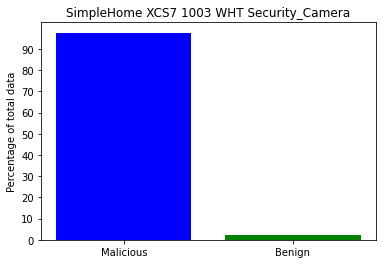

In [28]:
bar_x = ["Malicious", "Benign"]
percentage_malicious = malicious_data.shape[0]/(malicious_data.shape[0]+benign_data.shape[0]) * 100
percentage_benign =  benign_data.shape[0]/(malicious_data.shape[0]+benign_data.shape[0]) * 100

bar_y = [percentage_malicious,percentage_benign]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color=['blue','green'])

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(0, 100, step=10))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("Percentage of total data")
plt.title("SimpleHome XCS7 1003 WHT Security_Camera")
plt.savefig("figures/SimpleHome_XCS7_1003_WHT_Security_Camera")
plt.show()

In [30]:
print(f"Number of malicious:{malicious_data.shape[0]/(malicious_data.shape[0]+benign_data.shape[0]) * 100}")
print(f"Number of benign:{benign_data.shape[0]/(malicious_data.shape[0]+benign_data.shape[0]) * 100}")

Number of malicious:97.70481861156101
Number of benign:2.2951813884389995


scale the numberical values, which is all of them, in order to have a uniform distribution

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

print(malicious_data.iloc[0])

combine_data= pd.concat([malicious_data,benign_data], ignore_index=True); 

for col in benign_data.columns:
    scaler = MinMaxScaler();
    combine_data.loc[:,[col]] = scaler.fit_transform(combine_data[[col]])

print(combine_data.iloc[0])    

MI_dir_L5_weight           1.0
MI_dir_L5_mean           566.0
MI_dir_L5_variance         0.0
MI_dir_L3_weight           1.0
MI_dir_L3_mean           566.0
                         ...  
HpHp_L0.01_std             0.0
HpHp_L0.01_magnitude     566.0
HpHp_L0.01_radius          0.0
HpHp_L0.01_covariance      0.0
HpHp_L0.01_pcc             0.0
Name: 0, Length: 115, dtype: float64
MI_dir_L5_weight         0.000000
MI_dir_L5_mean           0.612467
MI_dir_L5_variance       0.000000
MI_dir_L3_weight         0.000000
MI_dir_L3_mean           0.643504
                           ...   
HpHp_L0.01_std           0.000000
HpHp_L0.01_magnitude     0.415345
HpHp_L0.01_radius        0.000000
HpHp_L0.01_covariance    0.007392
HpHp_L0.01_pcc           0.261200
Name: 0, Length: 115, dtype: float64


In [43]:
# gafgyt_junk=gafgyt_junk.T.drop_duplicates().T

# for col in gafgyt_junk.columns:
#     if col not in mirai_ack.columns:
#         print(col)

# print(len(mirai_ack.columns))
# print(len(gafgyt_junk.columns))


HH_L5_magnitude
HH_L5_pcc
HH_L3_magnitude
HH_L3_covariance
HH_L3_pcc
HH_L1_magnitude
HH_L1_covariance
HH_L1_pcc
HH_L0.1_magnitude
HH_L0.1_covariance
HH_L0.1_pcc
HH_L0.01_magnitude
HH_L0.01_covariance
HH_L0.01_pcc
HH_jit_L5_weight
HH_jit_L3_weight
HH_jit_L1_weight
HH_jit_L0.1_weight
HH_jit_L0.01_weight
HpHp_L5_magnitude
HpHp_L5_covariance
HpHp_L5_pcc
HpHp_L3_magnitude
HpHp_L3_covariance
HpHp_L3_pcc
HpHp_L1_magnitude
HpHp_L1_covariance
HpHp_L1_pcc
HpHp_L0.1_magnitude
HpHp_L0.1_covariance
HpHp_L0.1_pcc
HpHp_L0.01_magnitude
HpHp_L0.01_covariance
HpHp_L0.01_pcc
66
100


In [16]:
combine_data['Label'] = 1;
combine_data.loc[malicious_data.shape[0]:combine_data.shape[0],'Label'] = 0;
print(combine_data.loc[malicious_data.shape[0]])


MI_dir_L5_weight         0.000000e+00
MI_dir_L5_mean           8.326673e-17
MI_dir_L5_variance       0.000000e+00
MI_dir_L3_weight         0.000000e+00
MI_dir_L3_mean           9.714451e-17
                             ...     
HpHp_L0.01_magnitude     2.081668e-17
HpHp_L0.01_radius        0.000000e+00
HpHp_L0.01_covariance    7.392199e-03
HpHp_L0.01_pcc           2.612001e-01
Label                    0.000000e+00
Name: 968750, Length: 116, dtype: float64


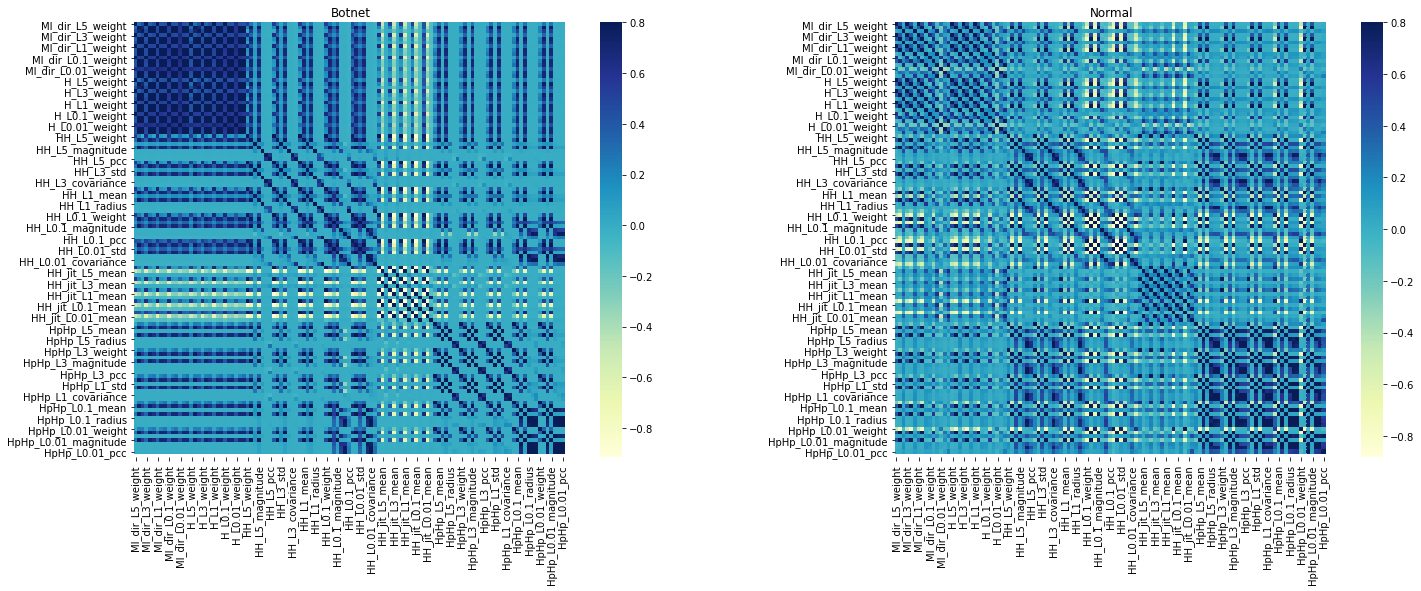

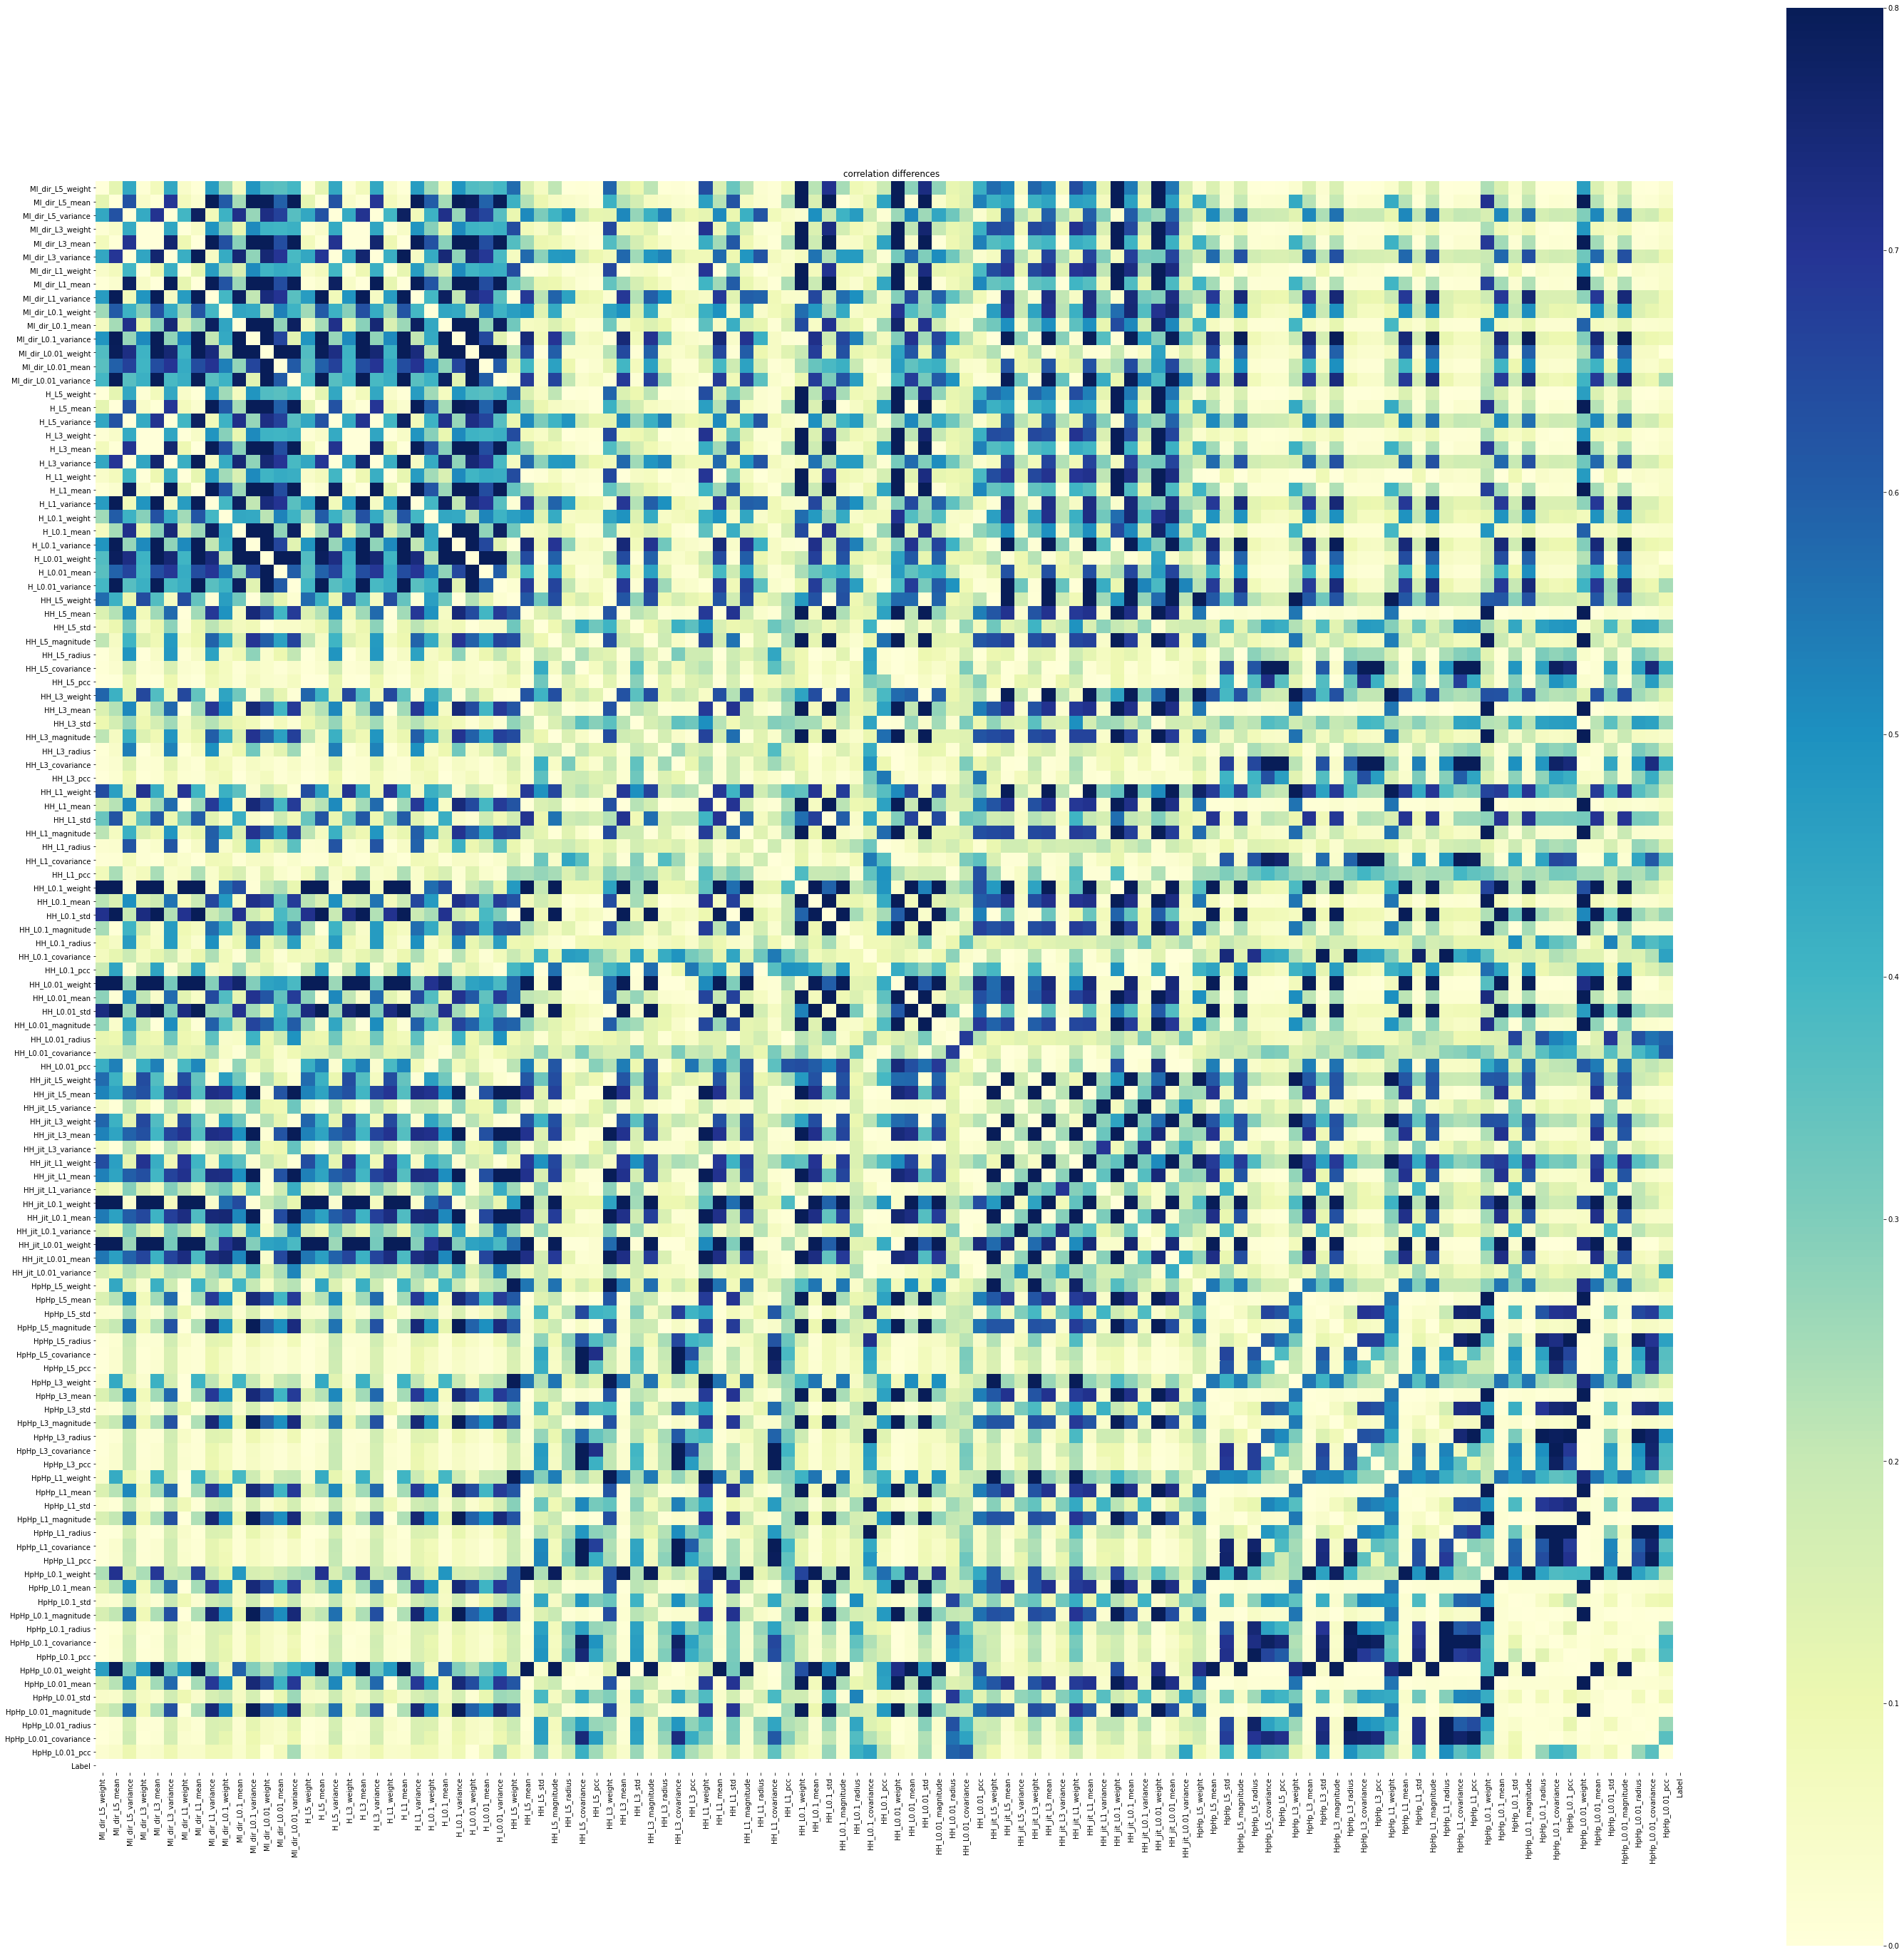

In [48]:
f, (ax1, ax2) = plt.subplots(1,2, figsize =(25, 8))
sns.heatmap(combine_data.query('Label==1').corr(), ax = ax1, vmax = .8, square=True, cmap = 'YlGnBu')
ax1.set_title('Botnet')
sns.heatmap(combine_data.query('Label==0').corr(), ax = ax2, vmax = .8, square=True, cmap = 'YlGnBu')
ax2.set_title("Normal")
plt.show()
f, ax3 = plt.subplots(1,1,figsize = (50,50))
sns.heatmap(abs(combine_data.query('Label==1').corr() - combine_data.query('Label==0').corr()), ax = ax3, vmax = .8, square=True, cmap = 'YlGnBu')
ax3.set_title("correlation differences")
plt.savefig("corr_matrix_incl_anno_double.png", dpi=300)
plt.show()


since the data has 115 features its saved in a png, file but when looking in general u can see that a smaller time window does seems to show overall better correlation between the malicious and benign data, mainly the 0.1 window

most important features on heatmap:






In [44]:
correlation_data = abs(combine_data.query('Label==1').corr() - combine_data.query('Label==0').corr());
correlation_data = correlation_data.drop(columns=['Label'], index=['Label']);
correlation_data[correlation_data > 0.8] = 0

In [46]:
correlation_data.sum().sort_values(ascending=True)[0:15]

HH_jit_L5_variance    12.616155
HH_L5_pcc             14.413324
HH_jit_L3_variance    14.477482
HH_L3_pcc             15.384542
HH_L5_radius          16.039409
HH_L5_covariance      16.161006
HH_L3_radius          16.233324
HH_L3_covariance      16.462226
HpHp_L1_radius        16.613766
HH_L1_radius          17.025960
HpHp_L5_pcc           17.487806
HH_jit_L1_variance    17.966539
MI_dir_L1_mean        18.012311
H_L1_mean             18.013217
HH_jit_L0.1_weight    18.221691
dtype: float64

To have a more in depth analysis we will look at the kernel density estimates

In [22]:
print(combine_data.columns)

Index(['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance',
       'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance',
       'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance',
       'MI_dir_L0.1_weight',
       ...
       'HpHp_L0.1_covariance', 'HpHp_L0.1_pcc', 'HpHp_L0.01_weight',
       'HpHp_L0.01_mean', 'HpHp_L0.01_std', 'HpHp_L0.01_magnitude',
       'HpHp_L0.01_radius', 'HpHp_L0.01_covariance', 'HpHp_L0.01_pcc',
       'Label'],
      dtype='object', length=116)


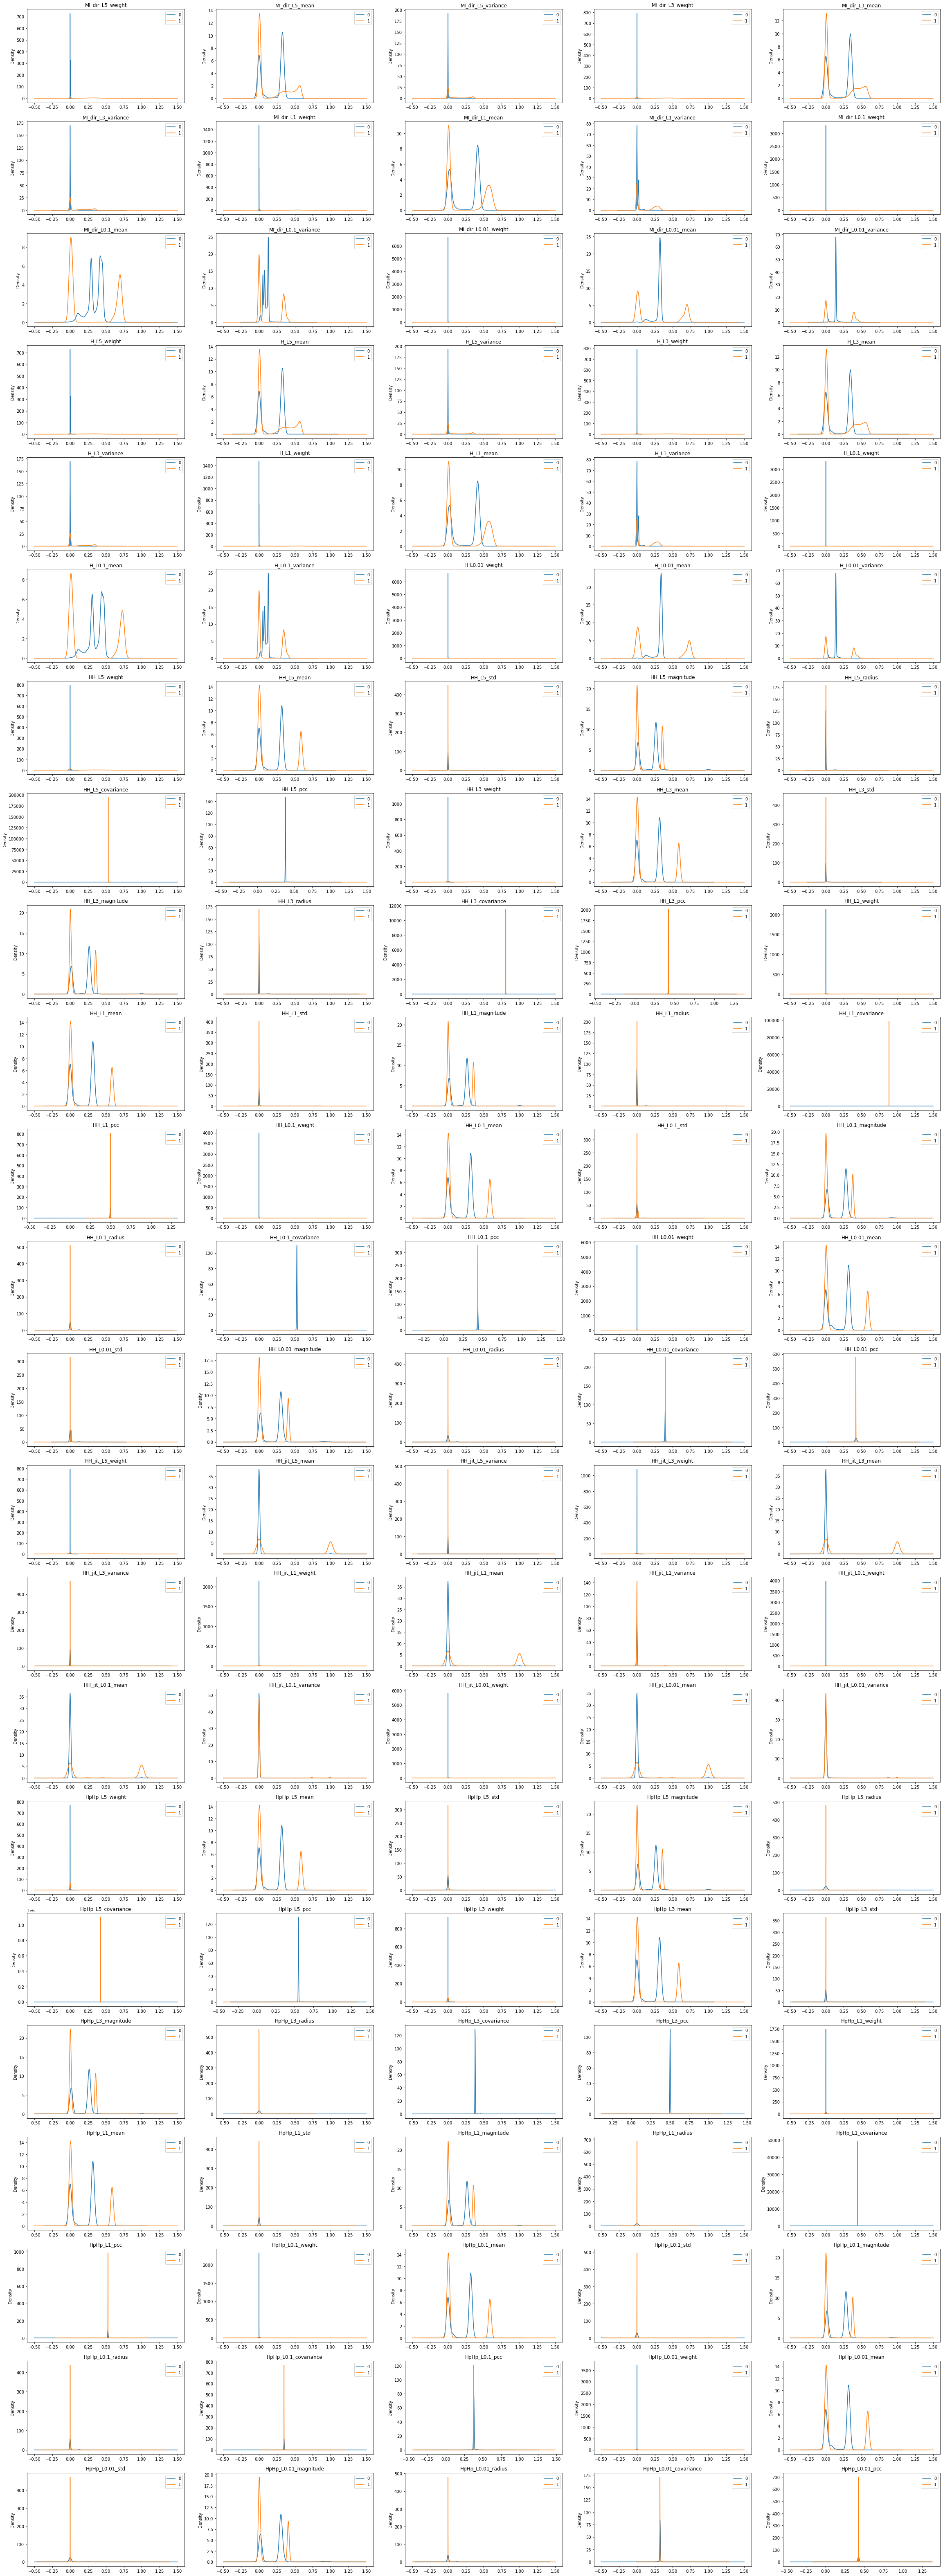

In [18]:
# i = 0
# j = 0


fig, axes = plt.subplots(nrows=23, ncols=5,figsize=(40, 115))
# print(axes)

for col,axe in zip(combine_data.columns,axes.ravel()):
    if col == "Label":
        continue;
    
#     if col == "MI_dir_L1_weight":
#         break;
        
    combine_data.groupby("Label")[col].plot(ax= axe, kind='kde',legend=True, title = col)


fig.savefig('SimpleHome_XCS7_1003_WHT_Security_Camera_kdeplots.png')

In [166]:
train_columns = [col for col in combine_data.columns if col != 'Label']
X = combine_data[train_columns]
y = combine_data[["Label"]]
print(y)

         Label
0            1
1            1
2            1
3            1
4            1
...        ...
1018293      0
1018294      0
1018295      0
1018296      0
1018297      0

[1018298 rows x 1 columns]


In [32]:
train_columns

['MI_dir_L5_weight',
 'MI_dir_L5_mean',
 'MI_dir_L5_variance',
 'MI_dir_L3_weight',
 'MI_dir_L3_mean',
 'MI_dir_L3_variance',
 'MI_dir_L1_weight',
 'MI_dir_L1_mean',
 'MI_dir_L1_variance',
 'MI_dir_L0.1_weight',
 'MI_dir_L0.1_mean',
 'MI_dir_L0.1_variance',
 'MI_dir_L0.01_weight',
 'MI_dir_L0.01_mean',
 'MI_dir_L0.01_variance',
 'H_L5_weight',
 'H_L5_mean',
 'H_L5_variance',
 'H_L3_weight',
 'H_L3_mean',
 'H_L3_variance',
 'H_L1_weight',
 'H_L1_mean',
 'H_L1_variance',
 'H_L0.1_weight',
 'H_L0.1_mean',
 'H_L0.1_variance',
 'H_L0.01_weight',
 'H_L0.01_mean',
 'H_L0.01_variance',
 'HH_L5_weight',
 'HH_L5_mean',
 'HH_L5_std',
 'HH_L5_magnitude',
 'HH_L5_radius',
 'HH_L5_covariance',
 'HH_L5_pcc',
 'HH_L3_weight',
 'HH_L3_mean',
 'HH_L3_std',
 'HH_L3_magnitude',
 'HH_L3_radius',
 'HH_L3_covariance',
 'HH_L3_pcc',
 'HH_L1_weight',
 'HH_L1_mean',
 'HH_L1_std',
 'HH_L1_magnitude',
 'HH_L1_radius',
 'HH_L1_covariance',
 'HH_L1_pcc',
 'HH_L0.1_weight',
 'HH_L0.1_mean',
 'HH_L0.1_std',
 'HH_L0.1

In [5]:
Kbest = SelectKBest(k=3)
X_new = Kbest.fit_transform(X, y)
list(compress(train_columns, Kbest.get_support()))

NameError: name 'X' is not defined

In [17]:
# selected_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'HH_L0.01_pcc'] 
# all_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'HH_L0.01_pcc'] 

#much better since malicious data more then benign
# all_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean']
# selected_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean']
                               
#5feat ml dir 0.1 weight 
# all_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean','HH_L0.01_pcc','MI_dir_L0.1_weight']
# selected_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean','HH_L0.01_pcc','MI_dir_L0.1_weight']

#plot purposes
all_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean','HH_L0.01_pcc']
selected_features = ['MI_dir_L1_weight', 'HH_L0.01_std', 'MI_dir_L0.01_mean','HH_L0.01_pcc']

# selected_features = list(compress(train_columns, Kbest.get_support()))
# all_features = list(compress(train_columns, Kbest.gwet_support()));

all_features.append('Label')
selected_feature_data = combine_data[all_features]
selected_feature_data

,MI_dir_L1_weight,HH_L0.01_std,MI_dir_L0.01_mean,HH_L0.01_pcc,Label
0,0.000000e+00,0.000000e+00,1.000000,0.272457,1
1,1.021423e-03,2.541718e-08,1.000000,0.272457,1
2,2.035791e-03,1.797266e-08,1.000000,0.272457,1
3,3.057911e-03,2.541718e-08,1.000000,0.272457,1
4,4.070760e-03,2.541718e-08,1.000000,0.272457,1
...,...,...,...,...,...
1018293,9.061115e-09,0.000000e+00,0.060104,0.272457,0
1018294,1.022127e-03,0.000000e+00,0.060862,0.272457,0
1018295,2.044228e-03,4.499411e-09,0.061571,0.272457,0
1018296,3.066308e-03,3.180212e-09,0.062236,0.272457,0


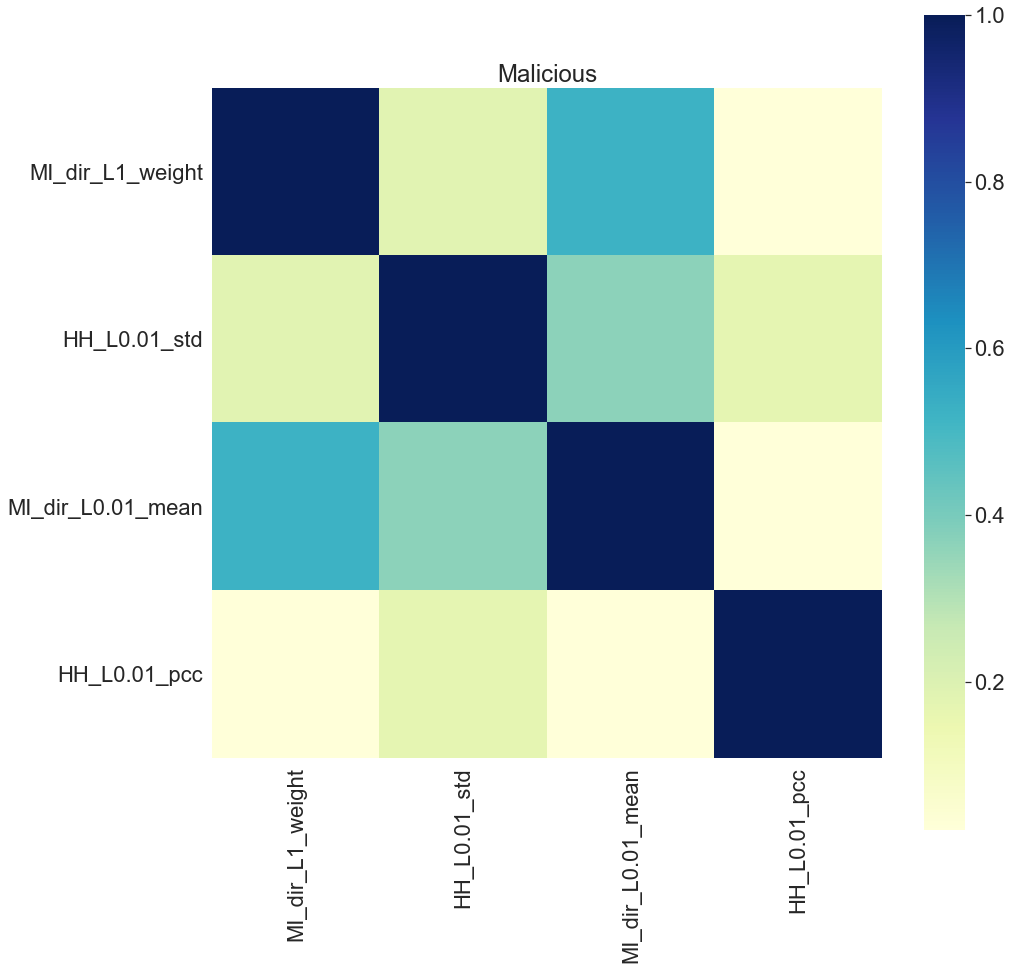

In [20]:
malicious_heatmap = selected_feature_data.query('Label==1')
benign_heatmap = selected_feature_data.query('Label==0')
malicious_heatmap = malicious_heatmap.drop(columns=["Label"])
benign_heatmap =benign_heatmap.drop(columns=["Label"])

# f, (ax1, ax2) = plt.subplots(2,1, figsize =(25, 35))
# sns.heatmap(abs(malicious_heatmap.corr()),annot=True, ax = ax1, square=True, cmap = 'YlGnBu')
# ax1.set_title('Malicious')
# sns.heatmap(abs(benign_heatmap.corr()),annot=True, ax = ax2, square=True, cmap = 'YlGnBu')
# ax2.set_title("Benign")
# plt.savefig('benign_and_malicious')
# plt.show()

f, ax1 = plt.subplots(1,1, figsize =(15, 15))
sns.set(font_scale=2.0)
sns.heatmap(abs(malicious_heatmap.corr()), ax = ax1, square=True, cmap = 'YlGnBu')
ax1.set_title('Malicious')
plt.savefig('malicious')
# sns.set(font_scale=2.0)
# sns.heatmap(abs(benign_heatmap.corr()), ax = ax1, square=True, cmap = 'YlGnBu')
# ax1.set_title("Benign")
# plt.savefig('benign')
plt.show()

# f, ax3 = plt.subplots(1,1,figsize = (25,8))
# sns.heatmap(abs(selected_feature_data.query('Label==1').corr() - selected_feature_data.query('Label==0').corr()), ax = ax3, vmax = .8, square=True, cmap = 'YlGnBu')
# ax3.set_title("correlation differences")
# plt.show()


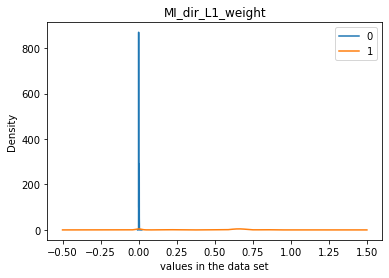

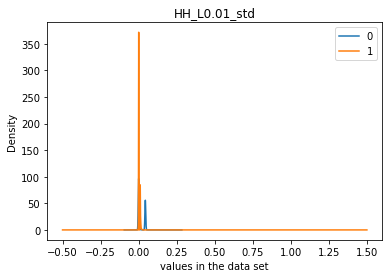

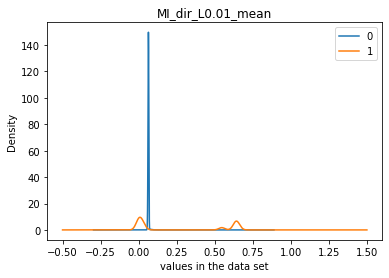

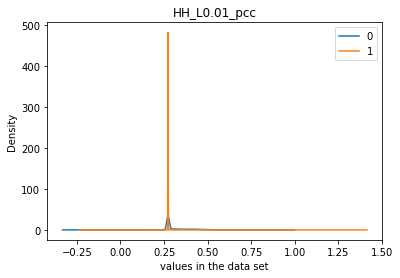

In [20]:
for col in selected_feature_data.columns:
    if col is 'Label':
        continue;
    selected_feature_data.groupby("Label")[col].plot(kind='kde',legend=True, title = col)
    plt.xlabel("values in the data set")
    plt.savefig('figures/'+str(col)+'.png')
    plt.show()



In [52]:
selected_feature_data.groupby("Label").mean()

,MI_dir_L1_weight,MI_dir_L0.1_weight,H_L1_weight,H_L0.1_weight,HH_L0.01_pcc
Label,,,,,
0,-1.467006,-1.466683,-1.467006,-1.466683,1.747139
1,0.075032,0.075015,0.075032,0.075015,-0.089360


In [53]:
selected_feature_data.groupby("Label").var()

,MI_dir_L1_weight,MI_dir_L0.1_weight,H_L1_weight,H_L0.1_weight,HH_L0.01_pcc
Label,,,,,
0,0.000026,3.436319e-07,0.000026,3.435012e-07,10.228874
1,0.935444,9.354961e-01,0.935444,9.354961e-01,0.363879


In [41]:
X_selected = selected_feature_data[selected_features]
y_selected = selected_feature_data[['Label']]

X_intermediate, X_test, y_intermediate, y_test = train_test_split(X_selected,y_selected,test_size=0.2);
X_train,X_weight,y_train,y_weight = train_test_split(X_intermediate,y_intermediate,test_size=0.05);

X_weight        

,MI_dir_L1_weight,HH_L0.01_std,MI_dir_L0.01_mean
39774,0.532415,0.000000e+00,5.591763e-01
30977,0.186648,0.000000e+00,4.074425e-05
52962,0.002115,0.000000e+00,6.820704e-02
49623,0.000000,0.000000e+00,2.775558e-17
80559,0.001304,0.000000e+00,6.556290e-02
...,...,...,...
87116,0.003066,5.625474e-09,7.020516e-02
34303,0.000000,0.000000e+00,2.775558e-17
2638,0.681413,1.166794e-02,6.508101e-01
25919,0.655974,6.007476e-04,1.882740e-02


In [45]:
# LR_model = LogisticRegression(class_weight='dict', verbose=1);
LR_model = LogisticRegression();
RF_model = RandomForestClassifier();
# Gauss_model= GaussianNB();
# good but not sure what the difference is
# SGD_model = SGDClassifier()
# pretty good and fast took 1 min, see whether this is faster then te papers
grad_model = GradientBoostingClassifier()

start_LR = time.process_time();
LR_model.fit(X_train,y_train);
print(f"LR_model train time:{time.process_time()-start_LR}")

start_RF = time.process_time();
RF_model.fit(X_train,y_train);
print(f"RF_model train time:{time.process_time()-start_RF}")

start_third = time.process_time();
# KNN_model.fit(X_train,y_train);
# Gauss_model.fit(X_train,y_train);
# SGD_model.fit(X_train,y_train);
grad_model.fit(X_train,y_train);
print(f"grad_model train time:{time.process_time()-start_third}")

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:0.203125


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RF_model train time:4.453125


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:9.15625


In [46]:
start_LR = time.process_time();
weight_1 = LR_model.score(X_weight,y_weight);
print(weight_1)
print(f"LR_model weight detection time:{time.process_time()-start_LR}")

start_RF = time.process_time();
weight_2 = RF_model.score(X_weight,y_weight);
print(weight_2)
print(f"RF_model weight detection time:{time.process_time()-start_RF}")

start_third = time.process_time();
weight_3 = grad_model.score(X_weight,y_weight);
# print(KNN_model.score(X_weight,y_weight))
# print(Gauss_model.score(X_weight,y_weight))
# print(SGD_model.score(X_weight,y_weight))
print(weight_3);
print(f"third_model weight detection time:{time.process_time()-start_third}")

weights = [weight_1, weight_2, weight_3]

0.9987568373943312
LR_model weight detection time:0.015625
1.0
RF_model weight detection time:0.046875
1.0
third_model weight detection time:0.0


In [47]:
start_LR = time.process_time();
LR_label = LR_model.predict(X_test);
print(accuracy_score(LR_label,y_test))
print(f"LR_model detection time:{time.process_time()-start_LR}")

start_RF = time.process_time();
RF_label = RF_model.predict(X_test);
print(accuracy_score(RF_label,y_test))
print(f"RF_model detection time:{time.process_time()-start_RF}")

start_third = time.process_time();
Grad_label = grad_model.predict(X_test);
# print(KNN_model.score(X_test,y_test))
# print(Gauss_model.score(X_test,y_test))
# print(SGD_model.score(X_test,y_test))
print(accuracy_score(Grad_label,y_test))
print(f"third_model detection time:{time.process_time()-start_third}")


0.9989555876063063
LR_model detection time:0.015625
0.9999005321529816
RF_model detection time:0.140625
0.9999005321529816
third_model detection time:0.03125


In [24]:
# weights = [1, 1, 1]

In [18]:
# calculate weights use, the prediction score as weight for the individual model
# predict the label over test set
# use the array of the predicted label and multiply with weight
# sum each data instance for each model
# divide by sum of the weights
# and round it
# seems to work fine

# also look at the frequency of the selectkbest features and plot the KDE, 
# get the features based on the densitiy
# try to take a covariance and feature with peak benign and diverse number as the features 

start_hybrid = time.process_time();

final_labels = []
for i in range(len(LR_label)):
    predicted_class = (weights[0]*LR_label[i]+weights[1]*RF_label[i]+weights[2]*Grad_label[i])/(weights[0]+weights[1]+weights[2]);
    final_labels.append(int(round(predicted_class)))

print(f"hybrid model detection time:{time.process_time()-start_hybrid}")
print(f"final accuracy score of the hybrid model:{accuracy_score(y_test,final_labels)}")
scores_array = precision_recall_fscore_support(y_test,final_labels,average='binary')
print(f"final precision score of the hybrid model:{scores_array[0]}")
print(f"final recall score of the hybrid model:{scores_array[1]}")
print(f"final f1 score of the hybrid model:{scores_array[2]}")


hybrid model detection time:0.8125
final accuracy score of the hybrid model:0.9999312579789846
final precision score of the hybrid model:0.9999896786978645
final recall score of the hybrid model:0.9999380753829006
final f1 score of the hybrid model:0.9999638763746329


Frequency

mi dir l1 weight: 3 

h l1 weight: 1  

hh l0.01 pcc: 2

mi dir l0.01 mean: 2

h l0.1 mean: 1

h l0.01 mean: 2

mi dir l0.1 weight: 2

h l0.1 weight: 2

hh l0.1 std: 2

hh l0.01 std: 3

hh l0.01 radius: 2

h l0.01 varian: 1


K-Fold

In [7]:
X_selected = selected_feature_data[selected_features]
y_selected = selected_feature_data[['Label']]

X, X_weight,y, y_weight = train_test_split(X_selected,y_selected,test_size=0.05);


y

,Label
1014808,0
1055800,0
811271,1
1011335,0
1073333,0
...,...
294325,1
401411,1
957704,0
864032,1


In [8]:
kf = KFold(n_splits=10,shuffle=True)
accuracy_scores= [];
precision_scores = [];
recall_scores = [];
f_scores= []

avg_train_LR = []
avg_test_LR = []
avg_train_RF = []
avg_test_RF = []
avg_train_Grad = []
avg_test_Grad = []
avg_hybrid = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"--------------------------------------------")
    print(f"--------------Fold {i}:---------------------")
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    
    
    LR_model = LogisticRegression();
    RF_model = RandomForestClassifier();
    grad_model = GradientBoostingClassifier()

    start_LR = time.process_time();
    LR_model.fit(X_train,y_train);
    end_LR = time.process_time()-start_LR
    print(f"LR_model train time:{end_LR}")
    avg_train_LR.append(end_LR)

    start_RF = time.process_time();
    RF_model.fit(X_train,y_train);
    end_RF = time.process_time()-start_RF
    print(f"RF_model train time:{end_RF}")
    avg_train_RF.append(end_RF)

    start_third = time.process_time();
    grad_model.fit(X_train,y_train);
    end_grad = time.process_time()-start_third
    print(f"grad_model train time:{end_grad}")
    avg_train_Grad.append(end_grad)
    
#     start_LR = time.process_time();
    weight_1 = LR_model.score(X_weight,y_weight);
#     print(weight_1)
#     print(f"LR_model weight detection time:{time.process_time()-start_LR}")

#     start_RF = time.process_time();
    weight_2 = RF_model.score(X_weight,y_weight);
#     print(weight_2)
#     print(f"RF_model weight detection time:{time.process_time()-start_RF}")

#     start_third = time.process_time();
    weight_3 = grad_model.score(X_weight,y_weight);
#     print(weight_3);
#     print(f"third_model weight detection time:{time.process_time()-start_third}")

    weights = [weight_1, weight_2, weight_3]
    
    start_LR = time.process_time();
    LR_label = LR_model.predict(X_test);
    end_LR = time.process_time()-start_LR
    print(f"LR_model detection time:{end_LR}")
    print(accuracy_score(LR_label,y_test))
    avg_test_LR.append(end_LR)
    

    start_RF = time.process_time();
    RF_label = RF_model.predict(X_test);
    end_RF = time.process_time()-start_RF
    print(f"RF_model detection time:{end_RF}")
    print(accuracy_score(RF_label,y_test))
    avg_test_RF.append(end_RF)
    

    start_third = time.process_time();
    Grad_label = grad_model.predict(X_test);
    end_grad = time.process_time()-start_third
    print(f"third_model detection time:{end_grad}")
    print(accuracy_score(Grad_label,y_test))
    avg_test_Grad.append(end_grad)
    
    start_hybrid = time.process_time();

    final_labels = []
    for i in range(len(LR_label)):
        predicted_class = (weights[0]*LR_label[i]+weights[1]*RF_label[i]+weights[2]*Grad_label[i])/(weights[0]+weights[1]+weights[2]);
        final_labels.append(int(round(predicted_class)))
    
    end_hybrid = time.process_time()-start_hybrid
    print(f"hybrid model detection time:{end_hybrid}")
    avg_hybrid.append(end_hybrid)
    
    
    ac_score = accuracy_score(y_test,final_labels)
    print(f"final accuracy score of the hybrid model:{ac_score}")
    scores_array = precision_recall_fscore_support(y_test,final_labels,average='binary')
    print(f"final precision score of the hybrid model:{scores_array[0]}")
    print(f"final recall score of the hybrid model:{scores_array[1]}")
    print(f"final f1 score of the hybrid model:{scores_array[2]}")
    
    accuracy_scores.append(ac_score)
    precision_scores.append(scores_array[0])
    recall_scores.append(scores_array[1])
    f_scores.append(scores_array[2])


print("--")
print(f"final mean accuracy score:{np.mean(accuracy_scores)}")
print(f"final mean precision score:{np.mean(precision_scores)}")
print(f"final mean recall score:{np.mean(recall_scores)}")
print(f"final mean f1 score:{np.mean(f_scores)}")
print("--")
print(f"final mean train LR speed:{np.mean(avg_train_LR)}")
print(f"final mean test LR speed:{np.mean(avg_test_LR)}")
print(f"final mean train RF speed:{np.mean(avg_train_RF)}")
print(f"final mean test RF speed:{np.mean(avg_test_RF)}")
print(f"final mean train grad speed:{np.mean(avg_train_Grad)}")
print(f"final mean test grad speed:{np.mean(avg_test_Grad)}")
print(f"final mean hybrid speed:{np.mean(avg_hybrid)}")


--------------------------------------------
--------------Fold 0:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:6.21875


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:115.015625


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:183.984375
LR_model detection time:0.015625
0.9913101796407185
RF_model detection time:0.703125
0.9999137724550898
third_model detection time:0.140625
0.9998275449101797
hybrid model detection time:0.40625
final accuracy score of the hybrid model:0.9998754491017964
final precision score of the hybrid model:0.9999429158579747
final recall score of the hybrid model:0.9999086685009076
final f1 score of the hybrid model:0.999925791886199
--------------------------------------------
--------------Fold 1:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:12.609375


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:96.609375


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:180.734375
LR_model detection time:0.015625
0.9915592814371258
RF_model detection time:0.625
0.9999137724550898
third_model detection time:0.125
0.9998083832335329
hybrid model detection time:0.359375
final accuracy score of the hybrid model:0.9998083832335329
final precision score of the hybrid model:0.999954402444029
final recall score of the hybrid model:0.9998176347223489
final f1 score of the hybrid model:0.9998860139063034
--------------------------------------------
--------------Fold 2:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:8.578125


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:105.640625


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:183.8125
LR_model detection time:0.015625
0.9912718562874252
RF_model detection time:0.625
0.9999041916167665
third_model detection time:0.125
0.9997700598802395
hybrid model detection time:0.359375
final accuracy score of the hybrid model:0.9998275449101797
final precision score of the hybrid model:0.9999657686646356
final recall score of the hybrid model:0.999828866755656
final f1 score of the hybrid model:0.9998973130241314
--------------------------------------------
--------------Fold 3:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:6.609375


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:83.890625


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:156.859375
LR_model detection time:0.0
0.9916933335888248
RF_model detection time:0.625
0.9999616762795333
third_model detection time:0.125
0.9998658669783662
hybrid model detection time:0.359375
final accuracy score of the hybrid model:0.9998946097687164
final precision score of the hybrid model:0.9999885838232776
final recall score of the hybrid model:0.999885849961189
final f1 score of the hybrid model:0.999937214253506
--------------------------------------------
--------------Fold 4:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:9.953125


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:83.328125


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:159.671875
LR_model detection time:0.0
0.9910993159215896
RF_model detection time:0.625
0.9999329334891831
third_model detection time:0.125
0.9997988004675494
hybrid model detection time:0.375
final accuracy score of the hybrid model:0.9998562860482496
final precision score of the hybrid model:0.9999658380495804
final recall score of the hybrid model:0.9998633662013526
final f1 score of the hybrid model:0.9999145995001223
--------------------------------------------
--------------Fold 5:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:10.0625


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:82.0


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:156.78125
LR_model detection time:0.015625
0.9913963247552072
RF_model detection time:0.640625
0.9999616762795333
third_model detection time:0.125
0.9998371241880162
hybrid model detection time:0.359375
final accuracy score of the hybrid model:0.9998850288385996
final precision score of the hybrid model:0.9999885974914481
final recall score of the hybrid model:0.9998745867061909
final f1 score of the hybrid model:0.9999315888489825
--------------------------------------------
--------------Fold 6:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:10.03125


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:86.171875


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:159.796875
LR_model detection time:0.0
0.9909076973192558
RF_model detection time:0.609375
0.9999233525590664
third_model detection time:0.125
0.9997413148868493
hybrid model detection time:0.375
final accuracy score of the hybrid model:0.999808381397666
final precision score of the hybrid model:0.9999089636651228
final recall score of the hybrid model:0.9998634517131121
final f1 score of the hybrid model:0.999886207171224
--------------------------------------------
--------------Fold 7:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:6.25


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:80.71875


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:157.28125
LR_model detection time:0.0
0.9913196773142736
RF_model detection time:0.59375
0.9998946097687164
third_model detection time:0.125
0.9997604767470826
hybrid model detection time:0.359375
final accuracy score of the hybrid model:0.9997892195374327
final precision score of the hybrid model:0.9998857821637427
final recall score of the hybrid model:0.9998629417273911
final f1 score of the hybrid model:0.9998743618151291
--------------------------------------------
--------------Fold 8:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:8.171875


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:81.703125


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:159.8125
LR_model detection time:0.0
0.9915879433575412
RF_model detection time:0.59375
0.9998946097687164
third_model detection time:0.125
0.9997029911663824
hybrid model detection time:0.375
final accuracy score of the hybrid model:0.9997700576771993
final precision score of the hybrid model:0.9998861644241058
final recall score of the hybrid model:0.9998406374501992
final f1 score of the hybrid model:0.9998634004189054
--------------------------------------------
--------------Fold 9:---------------------


c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR_model train time:8.265625


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF_model train time:83.265625


c:\program files\python37\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


grad_model train time:157.296875
LR_model detection time:0.0
0.991338839174507
RF_model detection time:0.625
0.9998946097687164
third_model detection time:0.125
0.9997508958169659
hybrid model detection time:0.375
final accuracy score of the hybrid model:0.9997892195374327
final precision score of the hybrid model:0.9999316496360343
final recall score of the hybrid model:0.9998177531238254
final f1 score of the hybrid model:0.9998746981364195
--
final mean accuracy score:0.9998304180050805
final mean precision score:0.999941866621995
final mean recall score:0.9998563756862173
final mean f1 score:0.9998991188960922
--
final mean train LR speed:8.675
final mean test LR speed:0.00625
final mean train RF speed:89.834375
final mean test RF speed:0.6265625
final mean train grad speed:165.603125
final mean test grad speed:0.1265625
final mean hybrid speed:0.3703125


### Unbalanced set


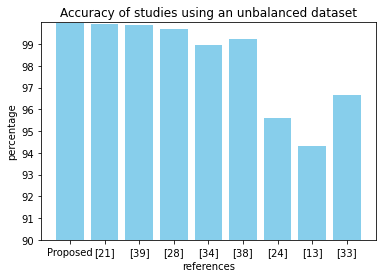

In [2]:
# presentation
bar_x = ["Proposed", "[3]", "[4]", "[5]", "[1]", "[6]", "[7]", "[8]", "[9]"]
bar_y = [99.98,99.94,99.88,99.68,98.98,99.25, 95.60,94.30, 96.65]

#report
bar_x = ["Proposed", "[21]", "[39]", "[28]", "[34]", "[38]", "[24]", "[13]", "[33]"]
bar_y = [99.98,99.94,99.88,99.68,98.98,99.25, 95.60,94.30, 96.65]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y,color='skyblue')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(90, 100, step=1))
plt.ylim((90,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Accuracy of studies using an unbalanced dataset")
plt.savefig("figures/accuracy_unbalanced")
plt.show()

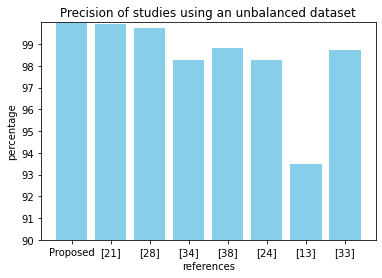

In [3]:
#presentation
bar_x = ["Proposed", "[3]", "[5]", "[1]", "[6]", "[7]", "[8]", "[9]"]
bar_y = [99.99, 99.91, 99.73, 98.26, 98.84, 98.27, 93.48, 98.71]

#report
bar_x = ["Proposed", "[21]", "[28]", "[34]", "[38]", "[24]", "[13]", "[33]"]
bar_y = [99.99, 99.91, 99.73, 98.26, 98.84, 98.27, 93.48, 98.71]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y ,color='skyblue')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(90, 100, step=1))
plt.ylim((90,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Precision of studies using an unbalanced dataset")
plt.savefig("figures/precision_unbalanced")
plt.show()

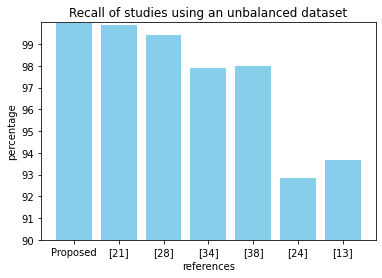

In [4]:
bar_x = ["Proposed", "[3]", "[5]", "[1]", "[6]", "[7]", "[8]"]
bar_y = [99.98, 99.86, 99.43, 97.88, 98.00, 92.82, 93.67]

bar_x = ["Proposed", "[21]", "[28]", "[34]", "[38]", "[24]", "[13]"]
bar_y = [99.98, 99.86, 99.43, 97.88, 98.00, 92.82, 93.67]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(90, 100, step=1))
plt.ylim((90,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Recall of studies using an unbalanced dataset")
plt.savefig("figures/Recall_unbalanced")
plt.show()

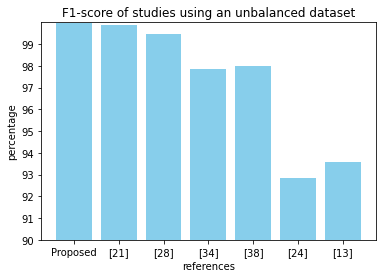

In [5]:
bar_x = ["Proposed", "[3]", "[5]", "[1]", "[6]", "[7]", "[8]"]
bar_y = [99.98, 99.86, 99.48, 97.87, 98.00, 92.82, 93.58]

bar_x = ["Proposed", "[21]", "[28]", "[34]", "[38]", "[24]", "[13]"]
bar_y = [99.98, 99.86, 99.48, 97.87, 98.00, 92.82, 93.58]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color ="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(90, 100, step=1))
plt.ylim((90,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("F1-score of studies using an unbalanced dataset")
plt.savefig("figures/fscore_unbalanced")
plt.show()

### Balanced set

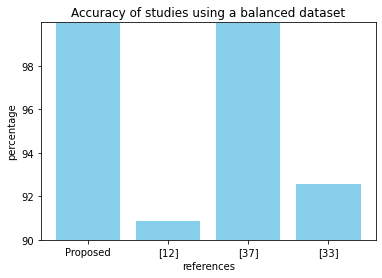

In [6]:
bar_x = ["Proposed", "[10]", "[11]", "[9]"]
bar_y = [99.97, 90.87, 99.96, 92.55]

bar_x = ["Proposed", "[12]", "[37]", "[33]"]
bar_y = [99.97, 90.87, 99.96, 92.55]


X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color= "skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(90, 100, step=2))
plt.ylim((90,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Accuracy of studies using a balanced dataset")
plt.savefig("figures/accuracy_balanced")
plt.show()

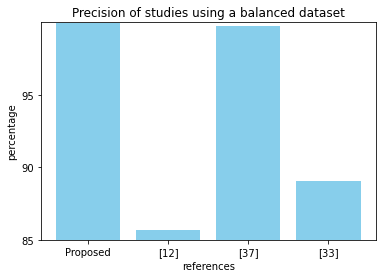

In [7]:
bar_x = ["Proposed", "[10]", "[11]", "[9]"]
bar_y = [99.96, 85.67, 99.77, 89.06]

bar_x = ["Proposed", "[12]", "[37]", "[33]"]
bar_y = [99.96, 85.67, 99.77, 89.06]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(85, 100, step=5))
plt.ylim((85,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Precision of studies using a balanced dataset")
plt.savefig("figures/precision_balanced")
plt.show()

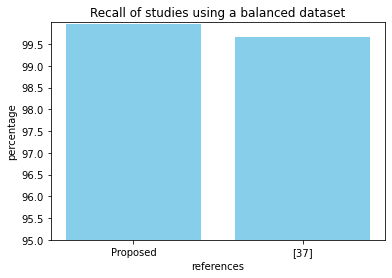

In [8]:
bar_x = ["Proposed", "[11]"]
bar_y = [99.96, 99.66]

bar_x = ["Proposed", "[37]"]
bar_y = [99.96, 99.66]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(95, 100, step=0.5))
plt.ylim((95,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("Recall of studies using a balanced dataset")
plt.savefig("figures/recall_balanced")
plt.show()

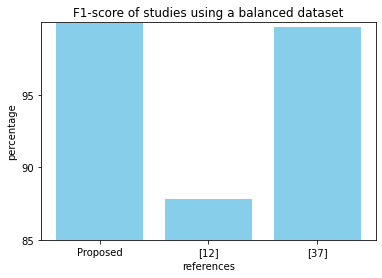

In [9]:
bar_x = ["Proposed", "[10]", "[11]"]
bar_y = [99.96, 87.83, 99.66]

bar_x = ["Proposed", "[12]", "[37]"]
bar_y = [99.96, 87.83, 99.66]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(85, 100, step=5))
plt.ylim((85,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("references")
plt.title("F1-score of studies using a balanced dataset")
plt.savefig("figures/fscore_balanced")
plt.show()

### Computational time

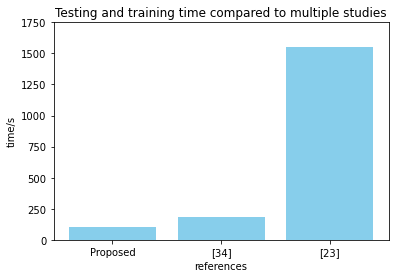

In [10]:
bar_x = ["Proposed", "[1]", "[12]"]
bar_y = [99, 180, 1550]

bar_x = ["Proposed", "[34]", "[23]"]
bar_y = [99, 180, 1550]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis, bar_y, color="skyblue")

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(0, 2000, step=250))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("time/s")
plt.xlabel("references")
plt.title("Testing and training time compared to multiple studies")
plt.savefig("figures/computationtime_danmini")
plt.show()

## PPC Set

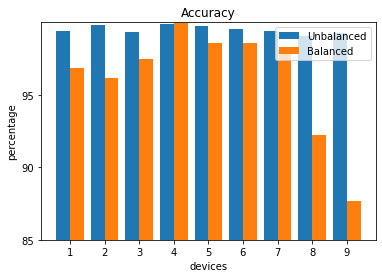

In [8]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.39, 99.80, 99.32, 99.89, 99.73, 99.53, 99.39, 99.09, 99.24]
balanced = [96.84, 96.16, 97.45, 99.94, 98.59, 98.61, 98.11, 92.24, 87.67]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(85, 100, step=5))
plt.ylim((85,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy_unbalanced_ppc")
plt.show()

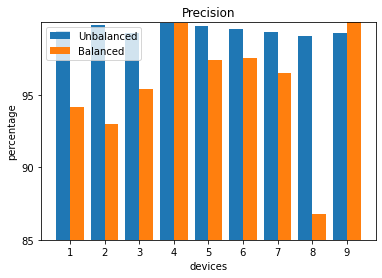

In [9]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.38, 99.80, 99.26, 99.98, 99.73, 99.52, 99.34, 99.06, 99.24]
balanced = [94.17, 92.97, 95.38, 99.95, 97.38, 97.53, 96.48, 86.80, 100.00]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(85, 100, step=5))
plt.ylim((85,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Precision")
plt.legend()
plt.savefig("figures/Precision_unbalanced_ppc")
plt.show()

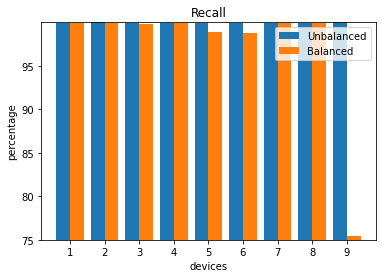

In [10]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.98, 99.99, 99.98, 99.98, 99.98, 99.95, 99.96, 99.98, 99.99]
balanced = [99.96, 99.92, 99.77, 99.94, 98.89, 98.83, 99.92, 99.91, 75.49]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(75, 100, step=5))
plt.ylim((75,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Recall")
plt.legend()
plt.savefig("figures/Recall_unbalanced_ppc")
plt.show()

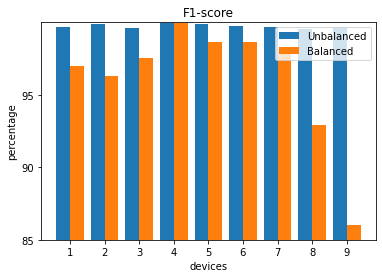

In [11]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.68, 99.90, 99.62, 99.98, 99.86, 99.74, 99.65, 99.52, 99.61]
balanced = [96.98, 96.32, 97.53, 99.94, 98.62, 98.67, 98.17, 92.89, 86.02]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(85, 100, step=5))
plt.ylim((85,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("F1-score")
plt.legend()
plt.savefig("figures/F1_unbalanced_ppc")
plt.show()

### Mean set

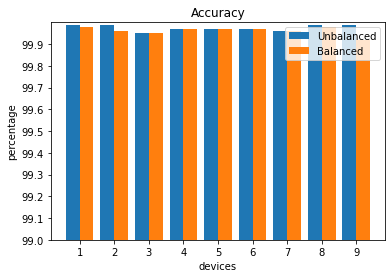

In [13]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.99, 99.99, 99.95, 99.97, 99.97, 99.97, 99.96, 99.99, 99.99]
balanced = [99.98, 99.96, 99.95, 99.97, 99.97, 99.97, 99.96, 99.98, 99.92]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(99, 100, step=0.1))
plt.ylim((99,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Accuracy")
plt.legend()
plt.savefig("figures/Accuracy_unbalanced_mean")
plt.show()

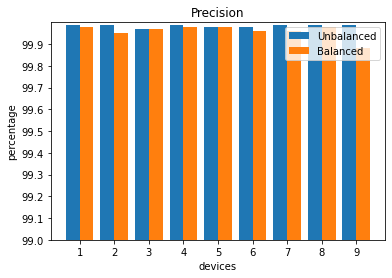

In [14]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.99, 99.99, 99.97, 99.99, 99.98, 99.98, 99.99, 99.99, 99.99]
balanced = [99.98, 99.95, 99.97, 99.98, 99.98, 99.96, 99.96, 99.98, 99.88]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(99, 100, step=0.1))
plt.ylim((99,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Precision")
plt.legend()
plt.savefig("figures/Precision_unbalanced_mean")
plt.show()

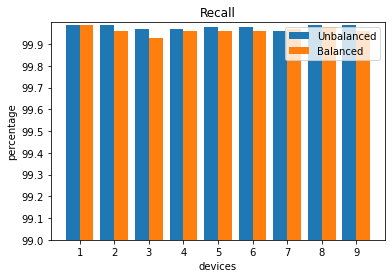

In [15]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.99, 99.99, 99.97, 99.97, 99.98, 99.98, 99.96, 99.99, 99.99]
balanced = [99.99, 99.96, 99.93, 99.96, 99.96, 99.96, 99.97, 99.98, 99.96]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(99, 100, step=0.1))
plt.ylim((99,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("Recall")
plt.legend()
plt.savefig("figures/Recall_unbalanced_mean")
plt.show()

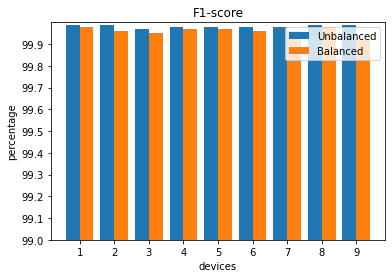

In [16]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [99.99, 99.99, 99.97, 99.98, 99.98, 99.98, 99.98, 99.99, 99.99]
balanced = [99.98, 99.96, 99.95, 99.97, 99.97, 99.96, 99.96, 99.98, 99.92]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(99, 100, step=0.1))
plt.ylim((99,100))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("percentage")
plt.xlabel("devices")
plt.title("F1-score")
plt.legend()
plt.savefig("figures/F1_unbalanced_mean")
plt.show()

### Computational time

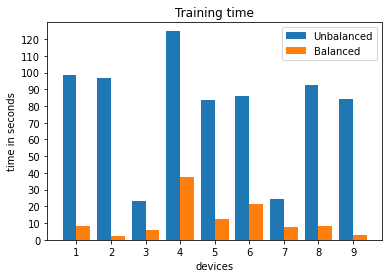

In [17]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [98.24, 96.83, 22.92, 124.87, 83.64, 85.93, 24.57, 92.73, 84.23]
balanced = [8.17, 1.99, 5.61, 37.81, 12.64, 21.52, 7.57, 8.15, 2.95]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(0, 130, step=10))
plt.ylim((0,130))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("time in seconds")
plt.xlabel("devices")
plt.title("Training time")
plt.legend()
plt.savefig("figures/training_mean")
plt.show()

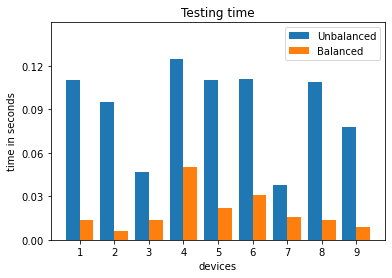

In [19]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [0.11, 0.095, 0.047, 0.125, 0.11, 0.111, 0.038, 0.109, 0.078]
balanced = [0.014, 0.00625, 0.014, 0.05, 0.022, 0.03125, 0.016, 0.014, 0.009]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(0, 0.15, step=0.03))
plt.ylim((0,0.15))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("time in seconds")
plt.xlabel("devices")
plt.title("Testing time")
plt.legend()
plt.savefig("figures/test_mean")
plt.show()

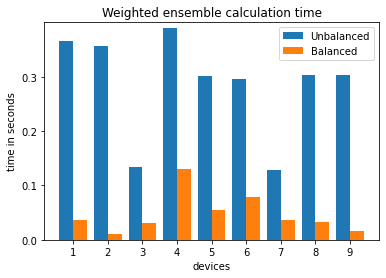

In [20]:
bar_x = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]

unbalanced = [0.366, 0.356, 0.134, 0.389, 0.302, 0.295, 0.129, 0.303, 0.303]
balanced = [0.036, 0.0109, 0.03, 0.13, 0.055, 0.079, 0.036, 0.033, 0.016]

X_axis = np.arange(len(bar_x))
  
plt.bar(X_axis - 0.2, unbalanced, 0.4, label = 'Unbalanced')
plt.bar(X_axis + 0.2, balanced, 0.4, label = 'Balanced')

plt.xticks(X_axis, bar_x)
plt.yticks(np.arange(0, 0.4, step=0.1))
plt.ylim((0,0.4))
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel("time in seconds")
plt.xlabel("devices")
plt.title("Weighted ensemble calculation time")
plt.legend()
plt.savefig("figures/ensemble_mean")
plt.show()

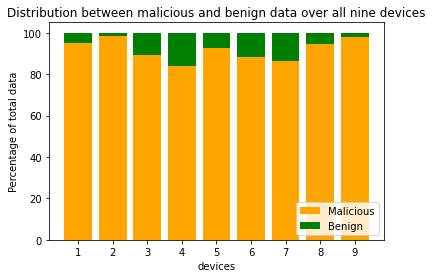

In [34]:

groups = ["1","2","3","4","5","6","7","8","9"]

malicious = [95.13, 98.43, 89.01, 84.05, 92.5, 88.23, 86.11, 94.6, 97.7]
benign = [4.87, 1.57, 10.99, 15.95, 7.5, 11.77, 13.89, 5.4, 2.3]
# width = 0.5

fig, ax = plt.subplots()
# bottom = np.zeros(9)

ax.bar(groups, malicious, color = "orange", label = "Malicious")
ax.bar(groups, benign, color = "green", bottom = malicious,  label = "Benign")
plt.ylabel("Percentage of total data")
plt.xlabel("devices")
ax.set_title("Distribution between malicious and benign data over all nine devices")
ax.legend(loc="lower right")
plt.savefig("figures/alldevicesdistrib")
plt.show()